# En Este notebook se generará un modelo de clasificación con una Regresión Logística

In [31]:
# Importamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
# Insertamos esta línea de código para que los números aparezcan separados por comas

pd.options.display.float_format = "{:,.2f}".format

In [4]:
# Cargamos los datos

datos = pd.read_csv("../datos_escalados.csv")

In [5]:
# Vemos que siga la consistencia con el número de columnas y filas

print(datos.shape)
datos.head(2)

(7032, 46)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.00,0.00,0.12,0.00,0.00,1.00,0.00,0.00,1.00,1.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,0.00,0.46,0.39,0.22,0.00,0.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


## Dividimos el Data set en entrenamiento y testing

In [6]:
# Elejimos a todas las variables excepto el Churn para el entrenamiento

X = datos.drop("Churn", axis = 1)
y = datos["Churn"].values

In [7]:
# Separamos en entrenamiento y prueba con train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
# Verificamos las dimensiones

print(X_train.shape)
print(X_test.shape)

(4922, 45)
(2110, 45)


In [9]:
# Generamos el modelo de regresión Logística

modelo = LogisticRegression()
resultado = modelo.fit(X_train, y_train)

/home/luisb/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluación del Modelo

In [10]:
# Medimos el accuracy

predicciones_testing = modelo.predict(X_test)
accuracy = (metrics.accuracy_score(y_test, predicciones_testing))

print("El accuracy del modelo es de " + str(accuracy*100) + "%"  )

El accuracy del modelo es de 79.5734597156398%


In [11]:
# Generamos la matriz de confusión

matriz_confusion = confusion_matrix(y_test, predicciones_testing)

<AxesSubplot:>

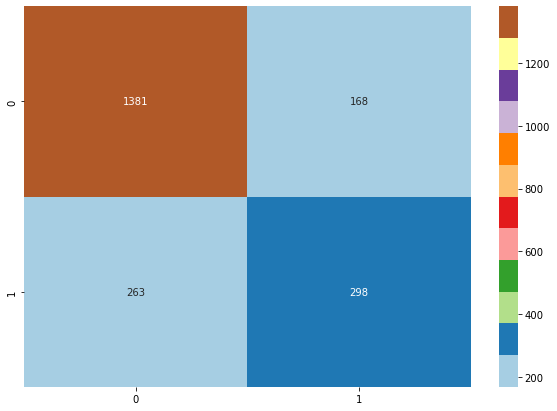

In [12]:
# Hacemos la gráfica de la matriz de confusión

plt.figure(figsize = (10,7))
sns.heatmap(matriz_confusion, annot=True, cmap = 'Paired', fmt='g')

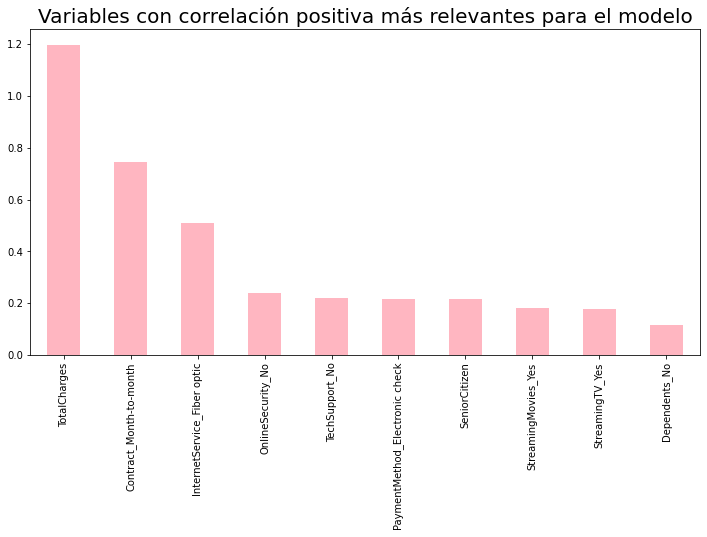

In [13]:
# Calculamos el nivel de relevancia que tienen las variables sobre el modelo

mas_relevante = pd.Series(modelo.coef_[0], index = X.columns.values)

# Graficamos el top 10 de la correlación positiva

top_10 = mas_relevante.sort_values(ascending = False)[:10]

plt.figure(figsize = (12,6))
top_10.plot(kind = "bar", color = "lightpink")
plt.title("Variables con correlación positiva más relevantes para el modelo", size = 20)

plt.show()


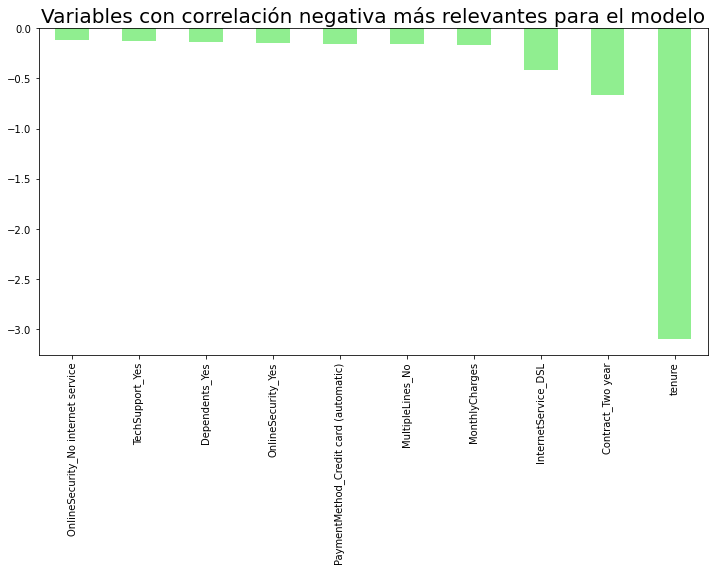

In [14]:
top_10_negativo = mas_relevante.sort_values(ascending = False)[-10:]

plt.figure(figsize = (12,6))
top_10_negativo.plot(kind = "bar", color = "lightgreen")
plt.title("Variables con correlación negativa más relevantes para el modelo", size = 20)

plt.show()


In [15]:
# Revisamos otras métricas como recall y F1

predicciones = modelo.predict(X_test).reshape(-1,1)
print(classification_report(y_test, predicciones))


              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

